# importing libraries

In [1]:
import pandas as pd #To manipulate data;data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import numpy as np #to work with arrays,;inear algebra
import warnings   #To avoid warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC    #support vector machine to predict the values
from xgboost import XGBClassifier #XGBoost classifier (gradient classifier)
from sklearn.neighbors import KNeighborsClassifier # To build model with KNN

from sklearn.tree import DecisionTreeClassifier #Decision Tree
import seaborn as sns #used for plot interactive graph. I like it most for plot
import matplotlib.pyplot as plt # this is used for the plot the graph 
from imblearn.combine import SMOTETomek# To handle imbalanced data
from mlxtend.classifier import StackingClassifier

from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data=pd.read_csv("project-file/bank -demo.csv")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
warnings.filterwarnings("ignore")

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
data.shape

(11162, 17)

# Exploratory Data Analysis

In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [10]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [12]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Data Visualization


# univariate analysis

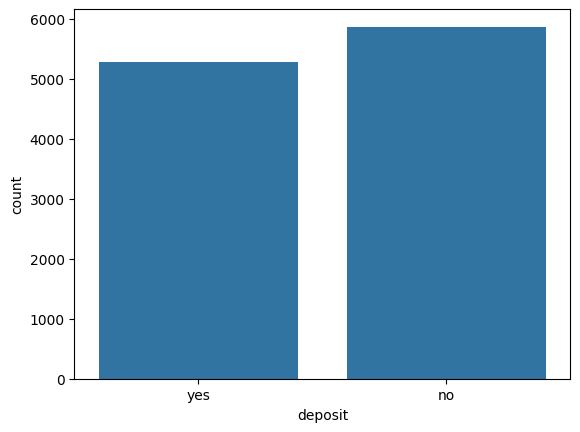

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [13]:
sns.countplot(x='deposit', data=data)
plt.show()
data['deposit'].value_counts()


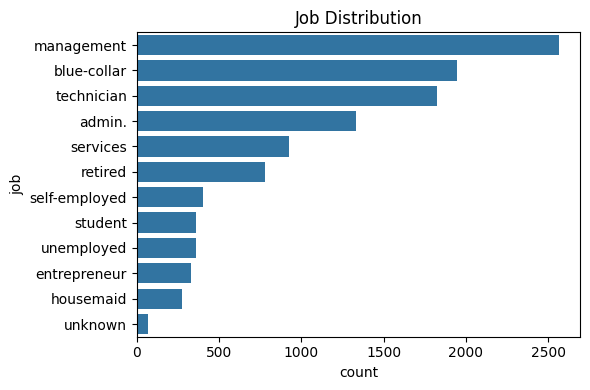

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, y='job', order=data['job'].value_counts().index)
plt.title('Job Distribution')
plt.tight_layout()
plt.show()

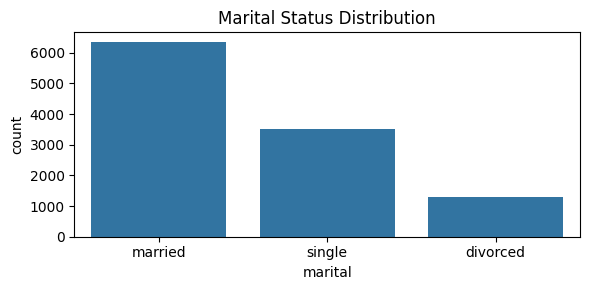

In [15]:
plt.figure(figsize=(6, 3))
sns.countplot(data=data, x='marital', order=data['marital'].value_counts().index)
plt.title('Marital Status Distribution')
plt.tight_layout()
plt.show()

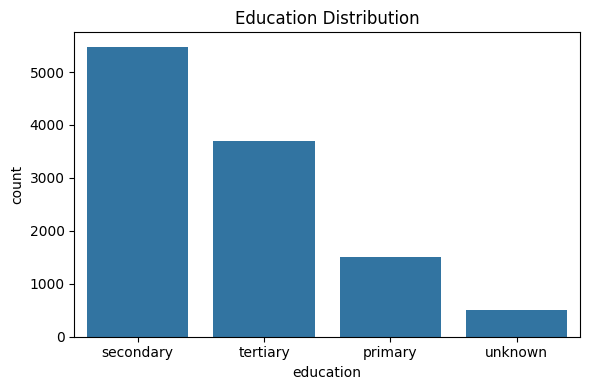

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='education', order=data['education'].value_counts().index)
plt.title('Education Distribution')
plt.tight_layout()
plt.show()


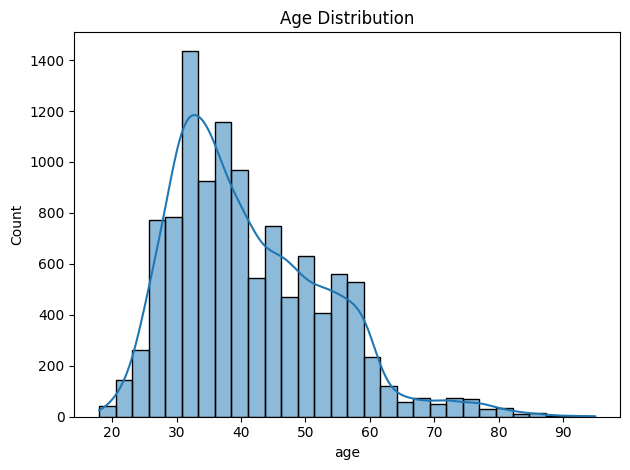

In [17]:
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.tight_layout()
plt.show()


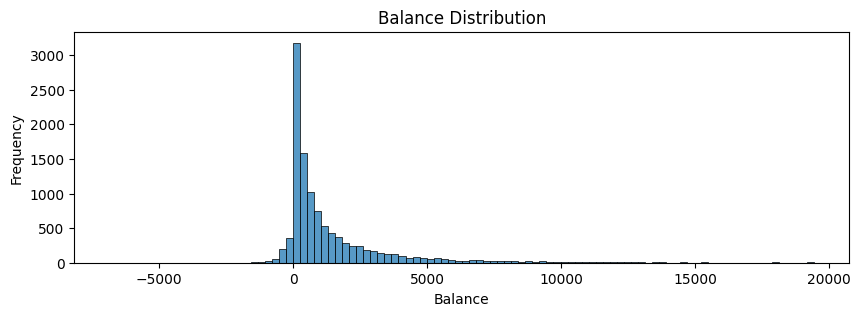

In [18]:
plt.figure(figsize=(10, 3))
sns.histplot(data[data['balance'] < 20000]['balance'], bins=100, kde=False)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

In [19]:
#bivariate analysis

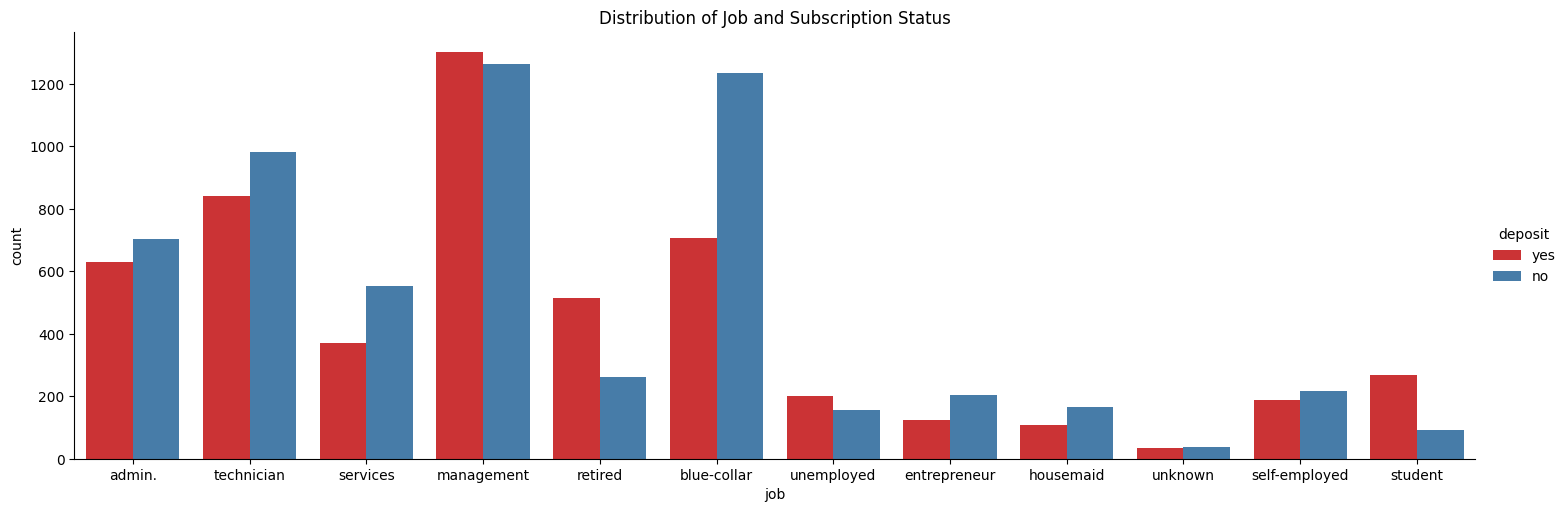

In [20]:
sns.catplot(x='job', hue='deposit', data=data, kind='count', palette='Set1', aspect=3)
plt.title('Distribution of Job and Subscription Status')
plt.show()

In [21]:
#by the analysis of employment status of the data.we can say that the people who belongs to employment sectors like admin,management,self-employed,technician are 
#having high chances to deposit or subscribe.

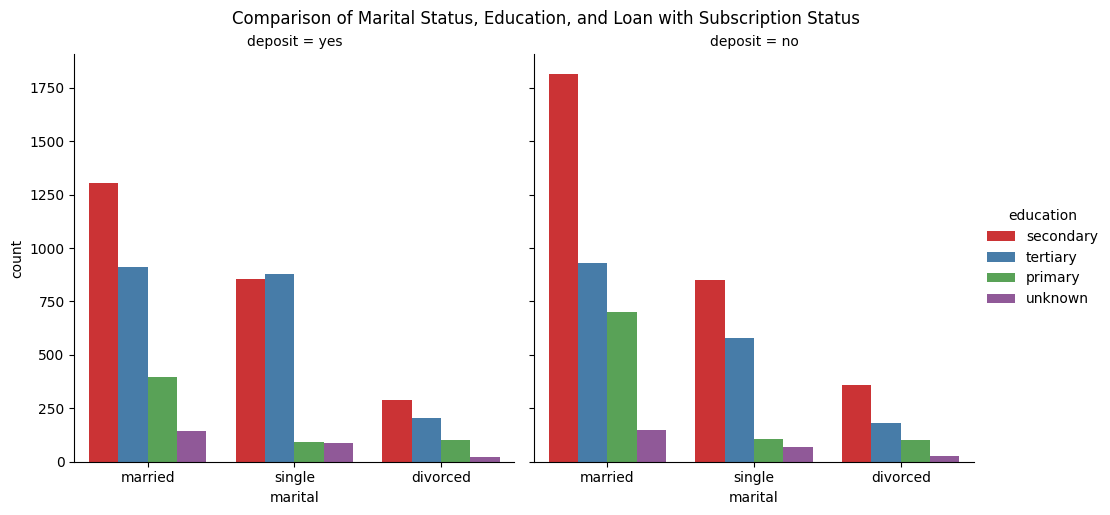

In [22]:
sns.catplot(x='marital', hue='education', col='deposit', data=data, kind='count', palette='Set1', col_wrap=2)
plt.suptitle('Comparison of Marital Status, Education, and Loan with Subscription Status', y=1.02)
plt.show()

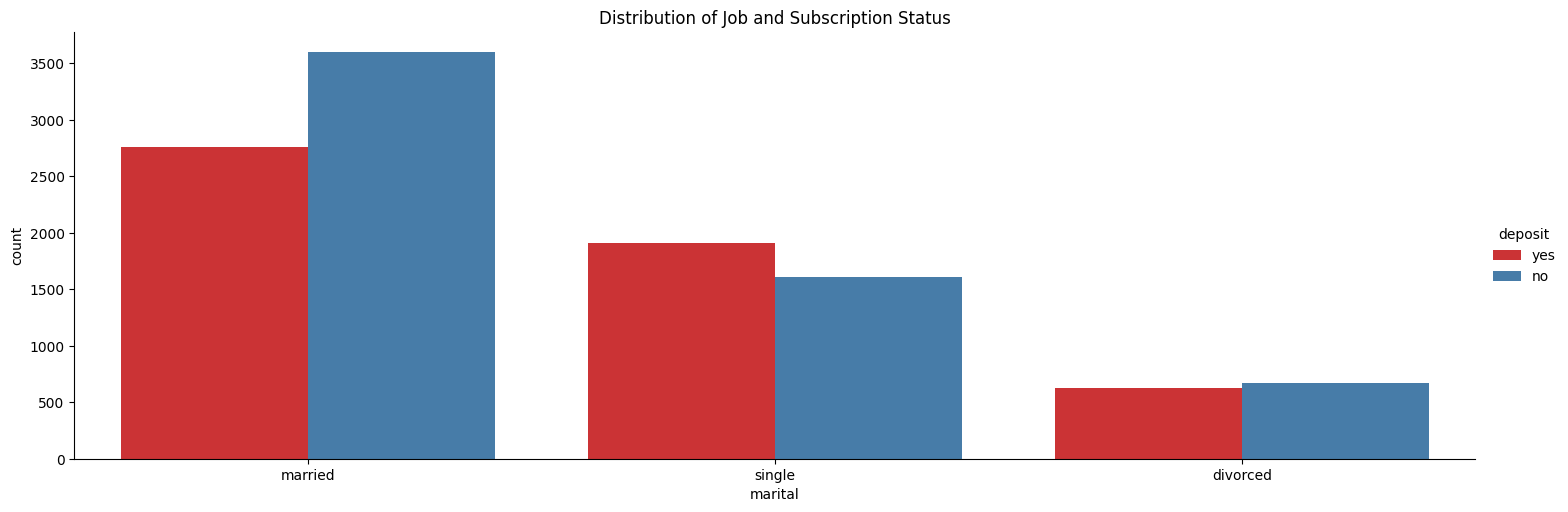

In [23]:
sns.catplot(x='marital', hue='deposit', data=data, kind='count', palette='Set1', aspect=3)
plt.title('Distribution of Job and Subscription Status')
plt.show()

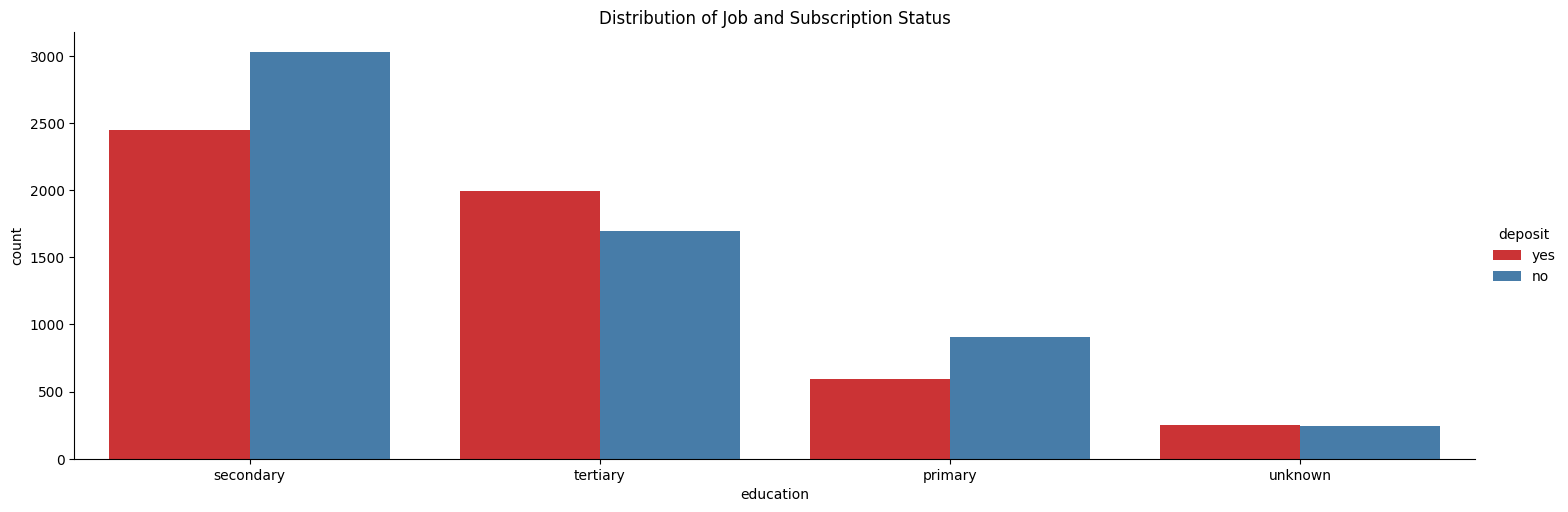

In [24]:
sns.catplot(x='education', hue='deposit', data=data, kind='count', palette='Set1', aspect=3)
plt.title('Distribution of Job and Subscription Status')
plt.show()

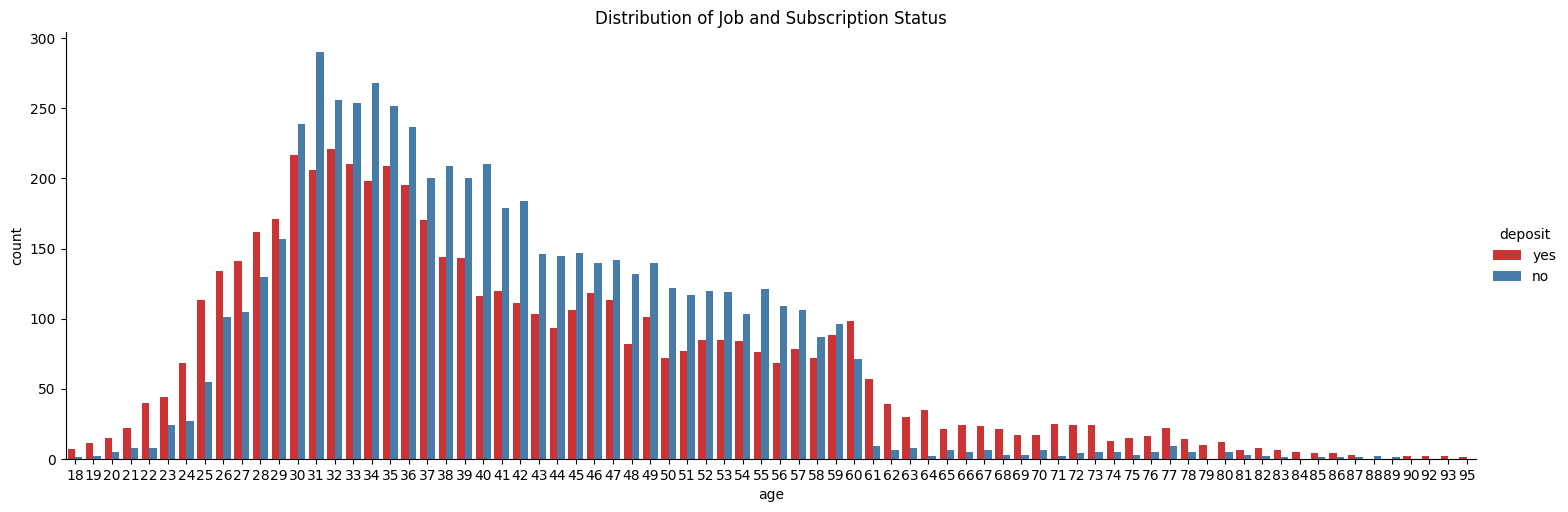

In [25]:
sns.catplot(x='age', hue='deposit', data=data, kind='count', palette='Set1', aspect=3)
plt.title('Distribution of Job and Subscription Status')
plt.show()

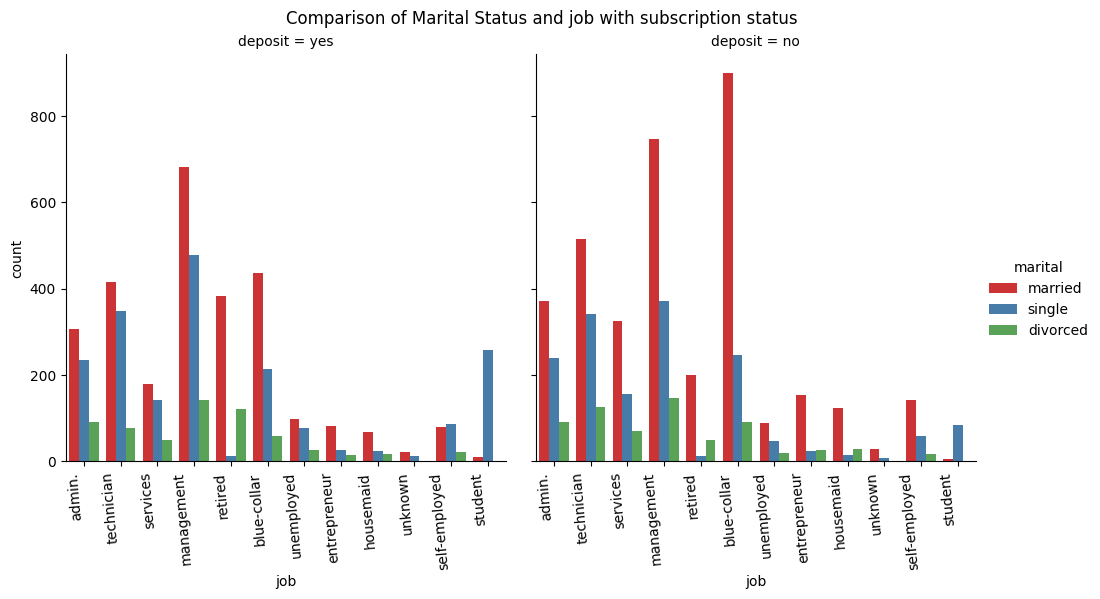

In [26]:
s=sns.catplot(x='job', hue='marital', col='deposit', data=data, kind='count', palette='Set1', col_wrap=2)
plt.suptitle('Comparison of Marital Status and job with subscription status', y=1.02)
s.set_xticklabels(rotation=95, ha='right')
plt.show()


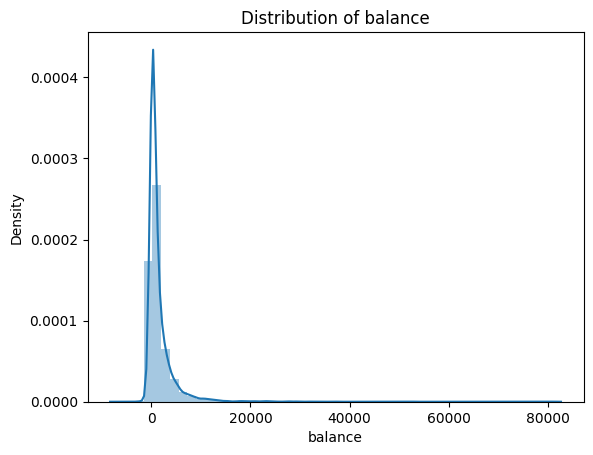

In [27]:
# analysing balance features
sns.distplot(data['balance'])
plt.title('Distribution of balance')
plt.show()
# print skewness and kurtosis value of the data
#kurtosis is used to determined whether the data is heavily tailed or not. If kurtosis value is high then it is 
#said to have highly tailed i.e. that is the data contain outliers.


Text(0.5, 0, 'Balance')

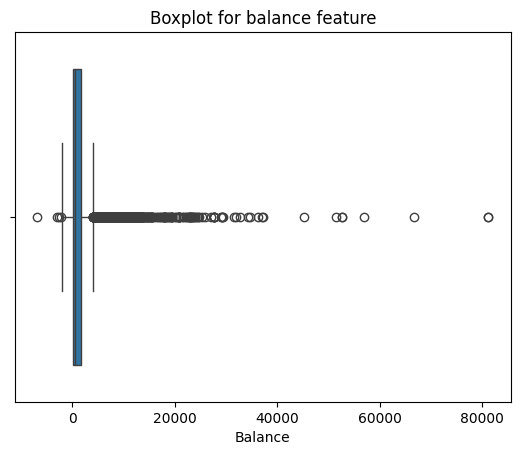

In [28]:
# boxplot for age
sns.boxplot(x = data["balance"])
plt.title("Boxplot for balance feature")
plt.xlabel("Balance")

# print skewness and kurtosis value of the data
#kurtosis is used to determined whether the data is heavily tailed or not. If kurtosis value is high then it is 
#said to have highly tailed i.e. that is the data contain outliers.

In [29]:
print("skewness: %f" % data['balance'].skew())

print("Kurtosis: %f" % data['balance'].kurt())


skewness: 8.224619
Kurtosis: 126.861303


You can see the distribution for the balance feature. It is highly left-skewed. It is very clear from the plot that the maximum balance is around 10000 and most of the distribution is between 0 to 10k.

The kurtosis value shows that the feature is highly tailed and it contains a heavy amount of outliers. Kurtosis defines the heaviness of the data.

Distribution of age

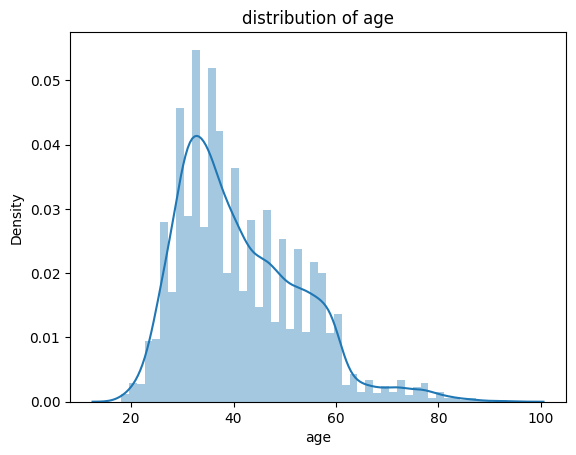

In [30]:
sns.distplot(data['age'])
plt.title("distribution of age")
plt.show()

Text(0.5, 0, 'Age')

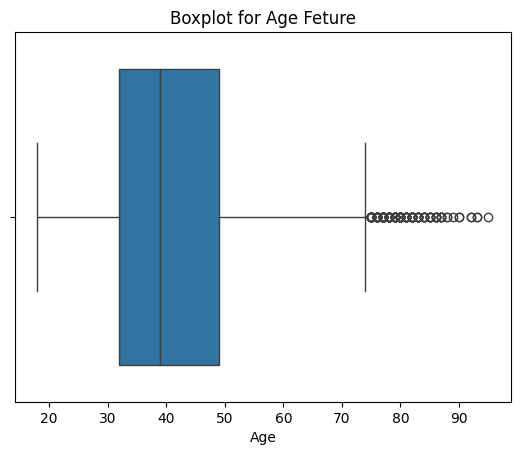

In [31]:
# boxplot for age
sns.boxplot(x = data['age'])
plt.title("Boxplot for Age Feture")
plt.xlabel("Age")

In [32]:
print("skewness: %f" % data['age'].skew())
print("Kurtosis: %f" % data['age'].kurt())

skewness: 0.862780
Kurtosis: 0.621540


You can see that the age feature is not very skewed and is also not normally distributed.
It may contain some outliers.
The average age distribution is around 35 to 40.
The kurtosis value is also very less which shows that the feature is not very tailed and the number of outliers is also less.

distribution of campaign

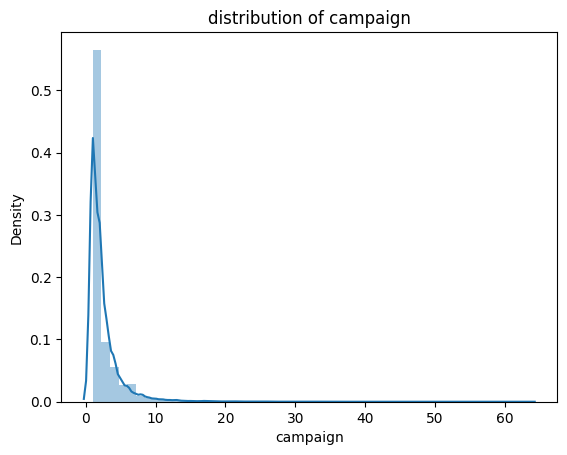

In [33]:
sns.distplot(data['campaign'])
plt.title("distribution of campaign")
plt.show()

Text(0.5, 0, 'campaign')

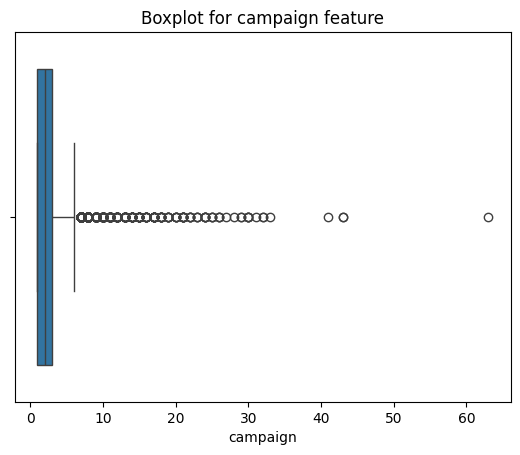

In [34]:
# boxplot for age
sns.boxplot(x = data["campaign"])
plt.title("Boxplot for campaign feature")
plt.xlabel("campaign")

In [35]:
print("skewness: %f" % data['campaign'].skew())
print("Kurtosis: %f" % data["campaign"].kurt())

skewness: 5.545578
Kurtosis: 57.389771


Distribution of Duration


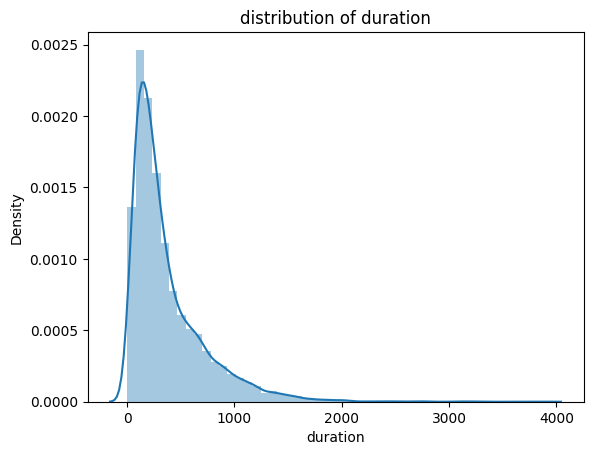

In [36]:
sns.distplot(data['duration'])
plt.title("distribution of duration")
plt.show()

Text(0.5, 0, 'duration')

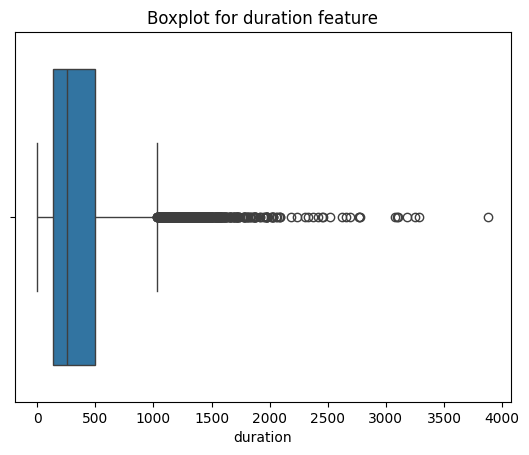

In [37]:
# boxplot for age
sns.boxplot(x = data["duration"])
plt.title("Boxplot for duration feature")
plt.xlabel("duration")

In [38]:
print("skewness: %f" % data["duration"].skew())
print("Kurtosis: %f" % data["duration"].kurt())

skewness: 2.143695
Kurtosis: 7.301282


It is left-skewed.
The maximum duration for contact is more than 3000 seconds.
The minimum duration is for around 1 second.

# Visualizations for data distributions and patterns


Text(0, 0.5, 'balance')

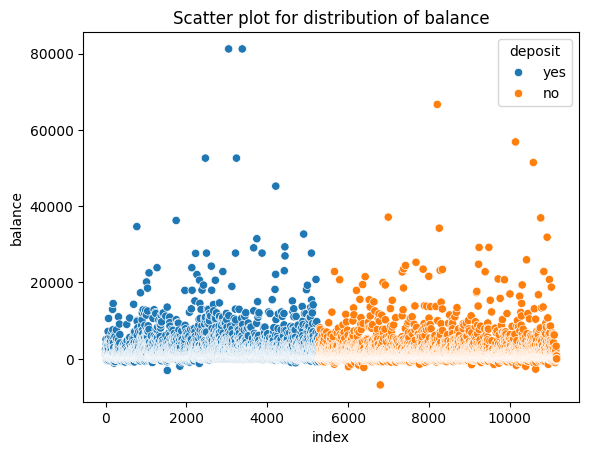

In [39]:
# plot scatter plot for balance data
sns.scatterplot(x = data.index, y = data['balance'], hue=data["deposit"])
plt.title("Scatter plot for distribution of balance")
plt.xlabel("index")
plt.ylabel("balance")

Clusters of Balance Values:

The majority of the data points have balance values clustered close to zero, indicating that most individuals have low account balances.
There are a few extreme balance values (e.g., above 40,000), which may represent outliers.
Distribution by Deposit Outcome:

The orange points (deposit = no) dominate the low balance range, suggesting that individuals with lower balances are less likely to make a deposit.
The blue points (deposit = yes) appear more prevalent among individuals with moderate to higher balances, suggesting a correlation between higher balances and a higher likelihood of making a deposit.
Outliers:

Some data points with extremely high balances (e.g., above 80,000) are visible. These may need to be further investigated to determine whether they are true outliers or represent valid data.
Data Imbalance:

It seems there are more orange points (deposit = no) overall, indicating a potential class imbalance in the dataset that should be addressed in preprocessing.

The next plot is the count plot for some categorical variable to represent the count of each category in the particular features. The below chart shows the count for the marital status of the customers.

Text(0.5, 1.0, 'Count of different marital status')

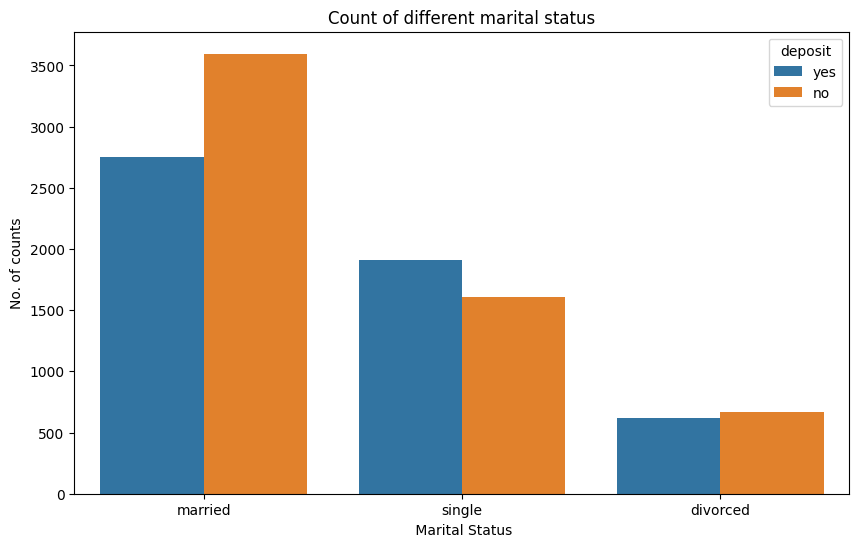

In [40]:
# count plot for marital data
plt.figure(figsize = (10,6))
sns.countplot(x=data['marital'] ,hue=data["deposit"])
plt.xlabel(" Marital Status")
plt.ylabel("No. of counts")
plt.title("Count of different marital status")

From the bar chart visualizing the marital status (married, single, divorced) against the deposit outcome (yes or no), we can infer the following:

General Trends by Marital Status:

Married:
The majority of married individuals did not make a deposit (orange bar is significantly higher than the blue bar).
This suggests that being married might correlate with a lower likelihood of making a deposit.
Single:
Single individuals have a higher proportion of those who made a deposit compared to married individuals (blue bar is closer in height to the orange bar).
This indicates that single people might be more likely to make deposits than married ones.
Divorced:
Divorced individuals show a nearly equal split between yes and no for deposits.
This suggests no strong association between being divorced and the likelihood of making a deposit.
Class Distribution:

There are significantly more married individuals in the dataset than single or divorced, which may affect overall predictions if not handled correctly (e.g., through balancing techniques).
Potential Predictive Insights:

Marital status appears to be a meaningful feature for predicting deposit behavior, as the proportions of yes and no vary across the categories

Text(0.5, 1.0, 'Count of different job category')

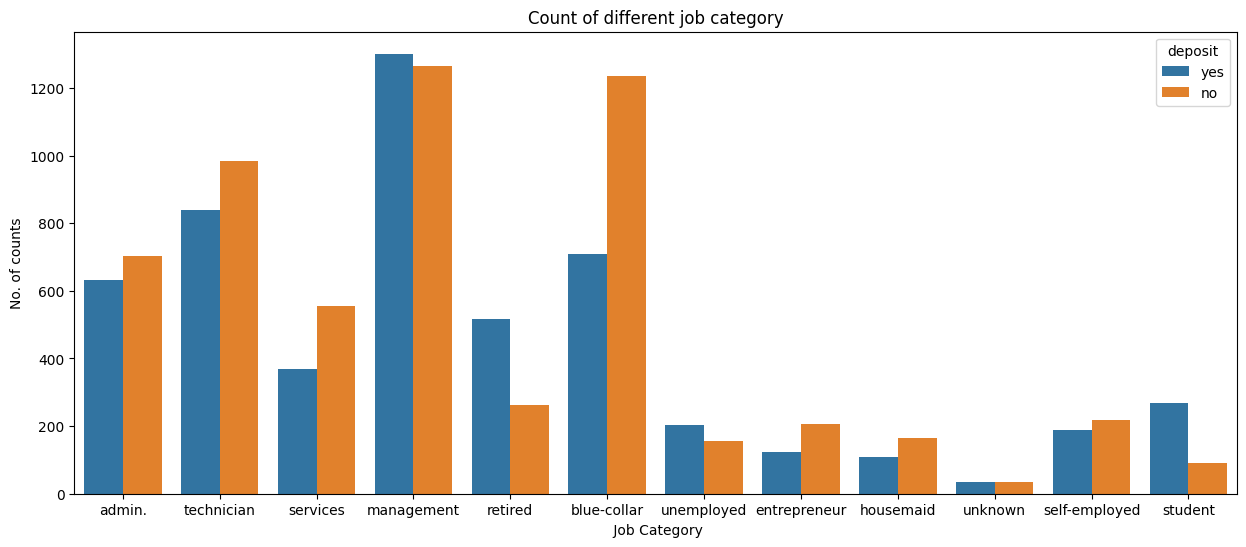

In [41]:
# plot for job category
plt.figure(figsize = (15,6))
sns.countplot(x=data['job'], hue = data['deposit'])
plt.xlabel(" Job Category")
plt.ylabel("No. of counts")
plt.title("Count of different job category")

People who are in management, blue-collar, and technical job are the one who has slightly better subscription as compared to the others.

the retired employees,students have higher chances of making term deposits.

Text(0.5, 1.0, 'Count of Campaign made')

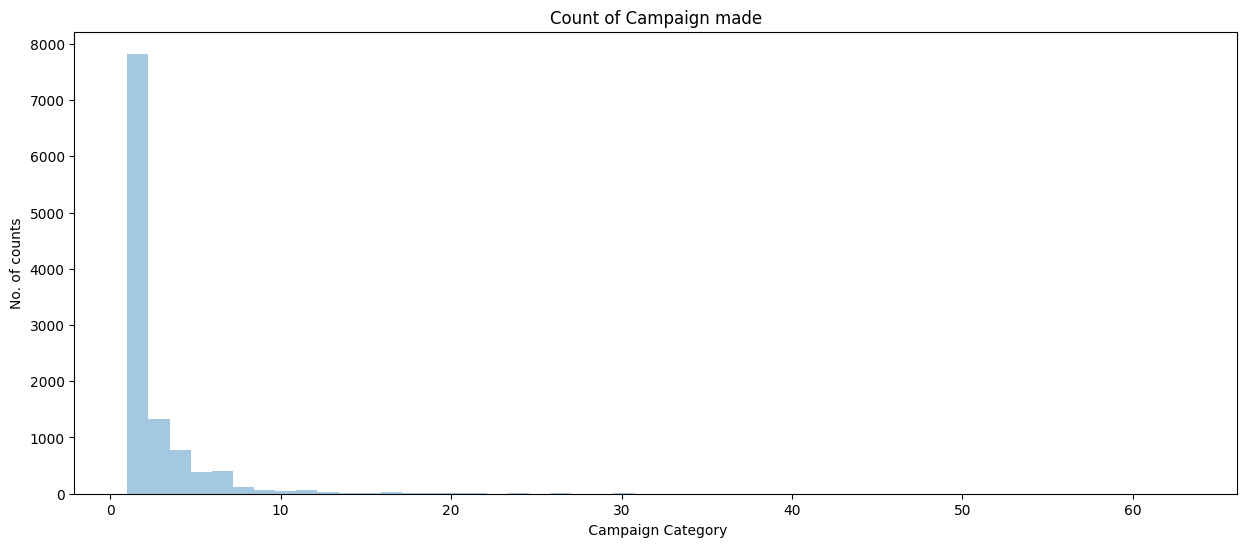

In [42]:
# plot for campaign category
plt.figure(figsize = (15,6))
sns.distplot(data['campaign'], kde = False)
plt.xlabel(" Campaign Category")
plt.ylabel("No. of counts")
plt.title("Count of Campaign made")

The maximum number of calls that are done is between 1 to 2.
The calls which made more than 10 are may by outliers.
The average call rate is around 2.

Text(0.5, 1.0, 'Count of target variable that is subscription')

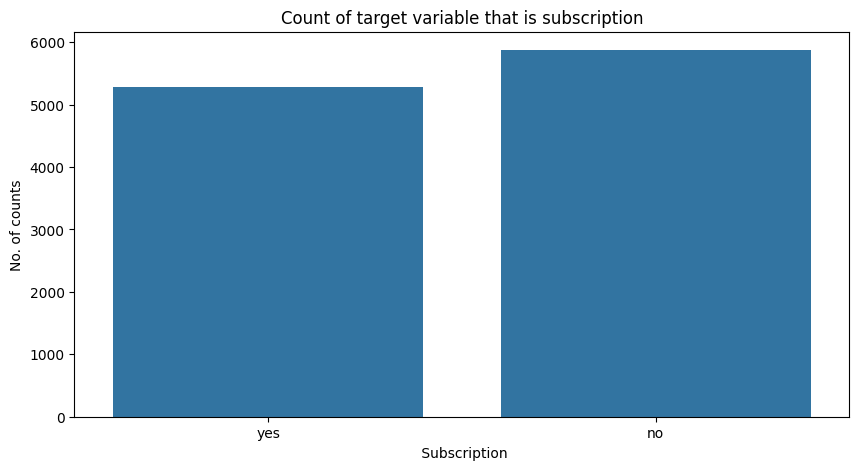

In [43]:
# plot for target variable
plt.figure(figsize = (10,5))
sns.countplot(x=data['deposit'])
plt.xlabel(" Subscription")
plt.ylabel("No. of counts")
plt.title("Count of target variable that is subscription")

# Outlier Removal

removing outliers

removing outliers from balance

In [44]:
#calculate IQR
Q1_balance=data["balance"].quantile(0.25)
Q3_balance=data["balance"].quantile(0.75)
IQR_balance=Q3_balance-Q1_balance

In [45]:
#calculating lower and upper limits
#by calculating limits we say the data lying within the limits are considered,the remaoining data is considered as outliers
balance_ll=Q1_balance-1.5*IQR_balance
balance_ul=Q3_balance+1.5*IQR_balance
print(balance_ll)
print(balance_ul)

-2257.0
4087.0


removing outliers from age

In [46]:
#calculate IQR
Q1_age=data["age"].quantile(0.25)
Q3_age=data["age"].quantile(0.75)
IQR_age=Q3_age-Q1_age

In [47]:
age_ll=Q1_age-1.5*IQR_age
age_ul=Q3_age+1.5*IQR_age
print(age_ll)
print(age_ul)

6.5
74.5


In [48]:
Q1_duration=data["duration"].quantile(0.25)
Q3_duration=data["duration"].quantile(0.75)
IQR_duration=Q3_duration-Q1_duration

In [49]:
duration_ll=Q1_duration-1.5*IQR_duration
duration_ul=Q3_duration+1.5*IQR_duration
print(duration_ll)
print(duration_ul)

-399.0
1033.0


removing outliers from campaign

In [50]:
Q1_campaign=data["campaign"].quantile(0.25)
Q3_campaign=data["campaign"].quantile(0.75)
IQR_campaign=Q3_campaign-Q1_campaign

In [51]:
campaign_ll=Q1_campaign-1.5*IQR_campaign
campaign_ul=Q3_campaign+1.5*IQR_campaign
print(campaign_ll)
print(campaign_ul)

-2.0
6.0


replacing the values to remove outliers

In [52]:
data.loc[data["balance"]>4087,"balance"]=4087
data.loc[data["age"]>74,"age"]=74
data.loc[data["duration"]>1033,"duration"]=1033
data[(data.campaign<campaign_ll)|(data.campaign>campaign_ll)]
data=data[(data.campaign>campaign_ll)&(data.campaign<campaign_ul)]

In [53]:
data.loc[data["balance"]<-2257,"balance"]=-2257
data.loc[data["age"]<7,"age"]=7
data.loc[data["duration"]<-399,"duration"]=-399
data[(data.campaign<campaign_ll)|(data.campaign>campaign_ll)]
data=data[(data.campaign>campaign_ll)&(data.campaign<campaign_ul)]

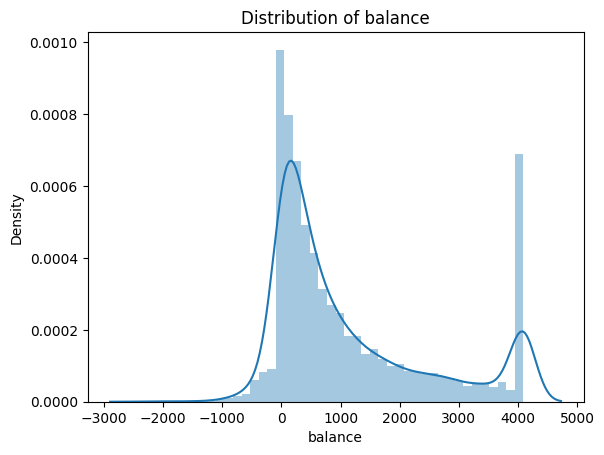

In [54]:
sns.distplot(data['balance'])
plt.title('Distribution of balance')
plt.show()

Text(0.5, 0, 'Balance')

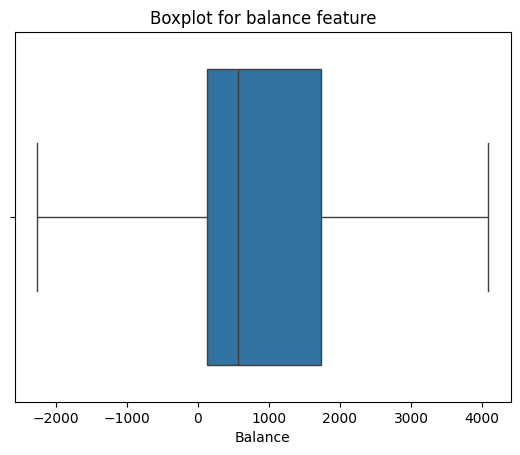

In [55]:
sns.boxplot(x = data["balance"])
plt.title("Boxplot for balance feature")
plt.xlabel("Balance")

In [56]:
print("skewness: %f" % data['balance'].skew())
print("Kurtosis: %f" % data['balance'].kurt())


skewness: 1.119225
Kurtosis: 0.026242


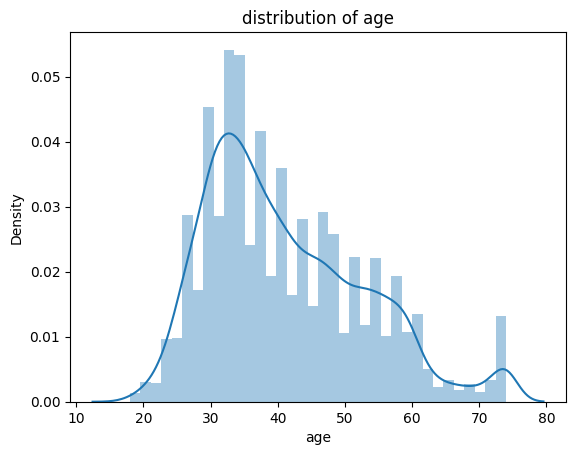

In [57]:
# distribution of age
sns.distplot(data['age'])
plt.title("distribution of age")
plt.show()

Text(0.5, 0, 'Age')

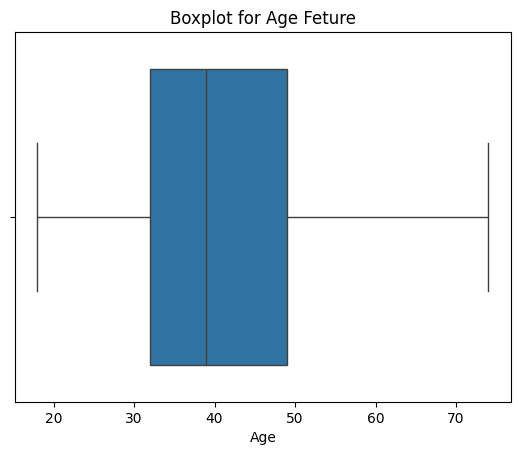

In [58]:
# boxplot for age
sns.boxplot(x = data['age'])
plt.title("Boxplot for Age Feture")
plt.xlabel("Age")

In [59]:
# print skewness and kurtosis value of the data
print("skewness: %f" % data['age'].skew())
print("Kurtosis: %f" %data['age'].kurt())

skewness: 0.724105
Kurtosis: -0.016772


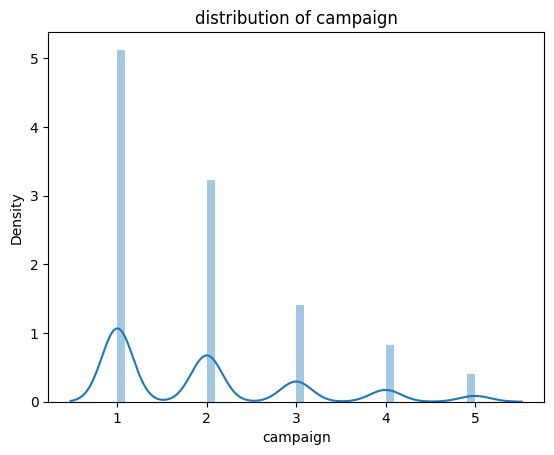

In [60]:
sns.distplot(data['campaign'])
plt.title("distribution of campaign")
plt.show()

Text(0.5, 0, 'campaign')

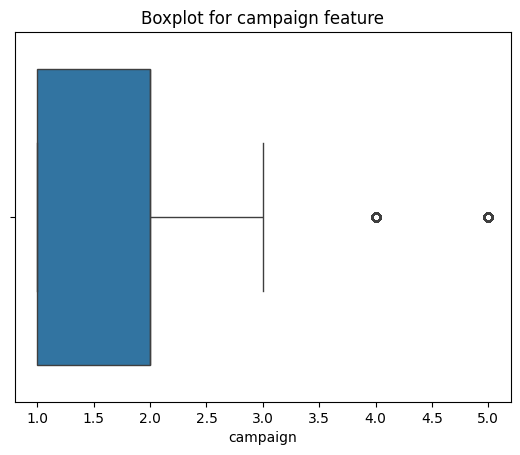

In [61]:
# boxplot for age
sns.boxplot(x = data["campaign"])
plt.title("Boxplot for campaign feature")
plt.xlabel("campaign")

In [62]:
print("skewness: %f" % data['campaign'].skew())
print("Kurtosis: %f" % data["campaign"].kurt())

skewness: 1.143591
Kurtosis: 0.505040


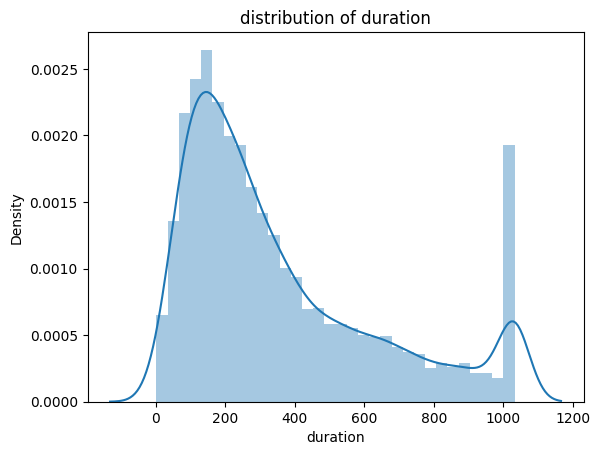

In [63]:
sns.distplot(data['duration'])
plt.title("distribution of duration")
plt.show()

Text(0.5, 0, 'duration')

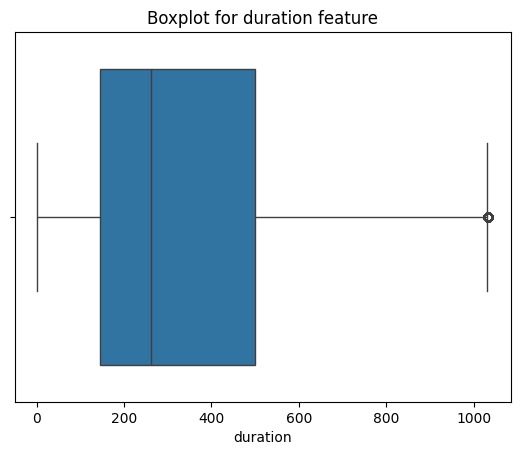

In [64]:
# boxplot for age
sns.boxplot(x = data["duration"])
plt.title("Boxplot for duration feature")
plt.xlabel("duration")

In [65]:
print("skewness: %f" % data["duration"].skew())
print("Kurtosis: %f" % data["duration"].kurt())

skewness: 1.085806
Kurtosis: 0.160505


We can see that the feature balance and duration were highly left-skewed before but now it has improved very much. There huge difference between the plot with outliers and without outliers.

Now, that I have done with the outliers handling it is time to do some more data preprocessing. Some of the features in the dataset contain some unknown values. I will consider these unknown values as null values and replace them with the most occurring values in that features.

In [66]:
print(data['poutcome'].value_counts())
print("***********\n")
print(data['contact'].value_counts())
print("***********\n")
print(data['education'].value_counts())
print("***********\n")
print(data['job'].value_counts())


poutcome
unknown    7538
failure    1202
success    1050
other       506
Name: count, dtype: int64
***********

contact
cellular     7490
unknown      2130
telephone     676
Name: count, dtype: int64
***********

education
secondary    5061
tertiary     3407
primary      1373
unknown       455
Name: count, dtype: int64
***********

job
management       2344
blue-collar      1796
technician       1674
admin.           1235
services          841
retired           743
self-employed     373
student           343
unemployed        340
entrepreneur      300
housemaid         246
unknown            61
Name: count, dtype: int64


In [67]:
# Here I have considered all unknown values as a Null values.
# Replacing all unknown values with the values which occure most number of times.
# since the size of dataset is small and the count of unknown values are huge in each feature mentioned above.
# So we can not drop these unknown values because it will affect the size of data which can cause problem.
data['poutcome'] = data['poutcome'].replace(['unknown'], 'failure')
data['contact'] = data['contact'].replace(['unknown'], 'cellular')
data['education'] = data['education'].replace(['unknown'], 'secondary')
data['job'] = data['job'].replace(['unknown'], 'management')
# print the count of values after filling the unknown values.
print(data['poutcome'].value_counts())
print("***********\n")
print(data['contact'].value_counts())
print("***********\n")
print(data['education'].value_counts())
print("***********\n")
print(data['job'].value_counts())

poutcome
failure    8740
success    1050
other       506
Name: count, dtype: int64
***********

contact
cellular     9620
telephone     676
Name: count, dtype: int64
***********

education
secondary    5516
tertiary     3407
primary      1373
Name: count, dtype: int64
***********

job
management       2405
blue-collar      1796
technician       1674
admin.           1235
services          841
retired           743
self-employed     373
student           343
unemployed        340
entrepreneur      300
housemaid         246
Name: count, dtype: int64


# Feature encoding for categorical values

In [68]:
# encoding categorical feature.
data['default'].replace({'yes':1,'no':0},inplace=True)
data['housing'].replace({'yes':1,'no':0},inplace=True)
data['loan'].replace({'yes':1,'no':0},inplace=True)
data['deposit'].replace({'yes':1,'no':0}, inplace=True)
data['contact'].replace({'cellular':1,'telephone':0},inplace=True)
data['month'].replace({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun' : 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}, inplace = True)
# one hot encoding for other categorical features.
data1 = pd.get_dummies(data = data, columns = ['poutcome', 'education', 'marital', 'job'])
data1.head()


#for heat map only
data2=pd.get_dummies(data=data,columns=['poutcome','education','marital','job','default','housing','loan','deposit','contact','month','marital'])

In [69]:
df=pd.DataFrame(data1)

In [70]:
print(list(df.columns))

['age', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'deposit', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'education_primary', 'education_secondary', 'education_tertiary', 'marital_divorced', 'marital_married', 'marital_single', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed']


In [71]:
df.head(1)

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,59,0,2343,1,0,1,5,5,1033,1,...,False,False,False,False,False,False,False,False,False,False


In [72]:
df2=df.iloc[0]
print(df2)
print(df.iloc[1])

age                       59
default                    0
balance                 2343
housing                    1
loan                       0
contact                    1
day                        5
month                      5
duration                1033
campaign                   1
pdays                     -1
previous                   0
deposit                    1
poutcome_failure        True
poutcome_other         False
poutcome_success       False
education_primary      False
education_secondary     True
education_tertiary     False
marital_divorced       False
marital_married         True
marital_single         False
job_admin.              True
job_blue-collar        False
job_entrepreneur       False
job_housemaid          False
job_management         False
job_retired            False
job_self-employed      False
job_services           False
job_student            False
job_technician         False
job_unemployed         False
Name: 0, dtype: object
age                 

In [73]:
df2=(56,0,45,0,0,1,5,5,1033,1,-1,0,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False)

In [74]:
df2=np.asarray(df2)

In [75]:
df2=df2.reshape(1,-1)

# Heatmap to check correlated features


Now it’s to time check for the correlated variable. For that, I will plot a heatmap and check whether there are any correlated features or not. If the features have more than a 95% of correlation value, I will drop one of the features.

<Axes: >

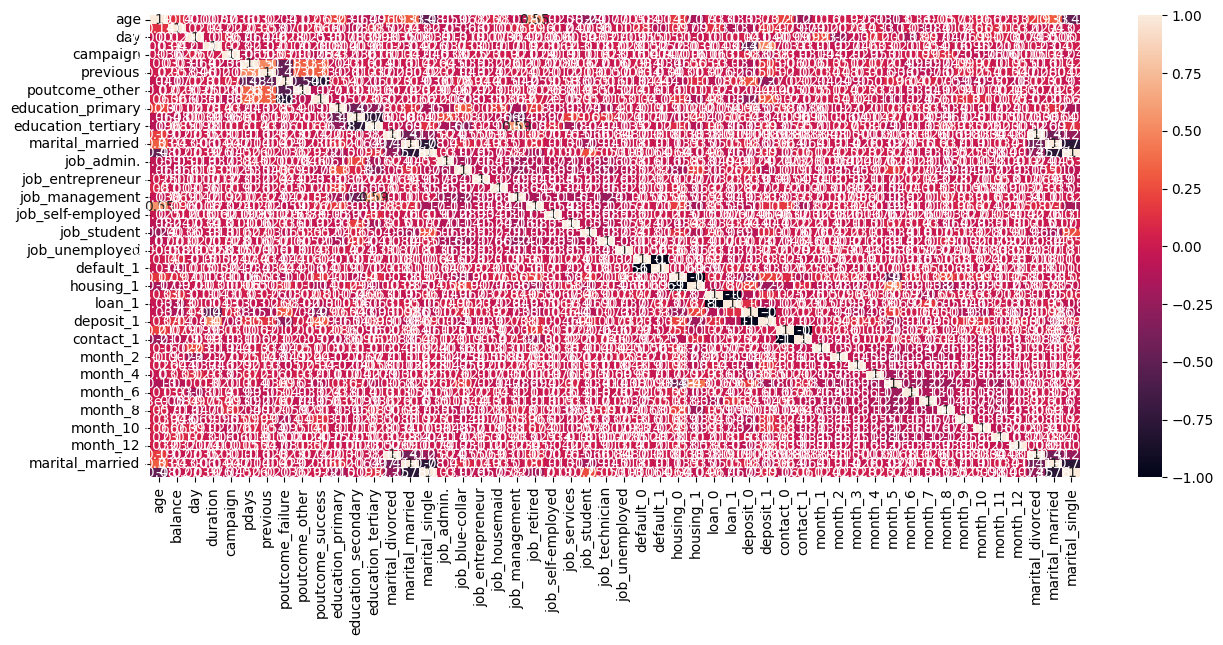

In [76]:
# heatmap plot help to find which two variables are correlated.
plt.figure(figsize=(15,6))
sns.heatmap(data2.corr(), annot=True)


There are no features which have high correlation values.
for calculating the features which are highly correlated we perform the following function.

From the above plot as we cannot directly visualize it,we perform calculations to identify the correlated variables


In [77]:
# Set the threshold for high correlation
threshold = 0.5 #0.9
corr_matrix=data2.corr()
# Create a mask to find correlations above the threshold (excluding self-correlation)
high_corr_pairs = np.where((corr_matrix > threshold) & (corr_matrix != 1))

# Extract the feature names that are highly correlated
highly_correlated_features = [(data2.columns[i], data2.columns[j]) for i, j in zip(*high_corr_pairs)]
print("Highly Correlated Features:", highly_correlated_features)

Highly Correlated Features: [('age', 'job_retired'), ('pdays', 'previous'), ('previous', 'pdays'), ('education_tertiary', 'job_management'), ('job_management', 'education_tertiary'), ('job_retired', 'age')]


5. Variance Inflation Factor (VIF)
Another technique to detect multicollinearity (highly correlated features) is Variance Inflation Factor (VIF). VIF quantifies how much a feature is inflated due to the presence of correlations with other features.

A high VIF (>10) indicates that the feature is highly collinear with others and might need to be removed.

In [78]:
# perform standard scaler to scale down the vlaues.
from sklearn.preprocessing import StandardScaler
scaled_col = ['age', 'balance', 'duration', 'pdays']
scaler =StandardScaler()
data1[scaled_col] = scaler.fit_transform(data1[scaled_col])

In [79]:
# encoding categorical feature.
data['default'].replace({'yes':1,'no':0},inplace=True)
data['housing'].replace({'yes':1,'no':0},inplace=True)
data['loan'].replace({'yes':1,'no':0},inplace=True)
data['deposit'].replace({'yes':1,'no':0}, inplace=True)
data['contact'].replace({'cellular':1,'telephone':0},inplace=True)
data['month'].replace({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun' : 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}, inplace = True)
# one hot encoding for other categorical features.
data1 = pd.get_dummies(data = data, columns = ['poutcome', 'education', 'marital', 'job'])
data1.head()


,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,59,0,2343,1,0,1,5,5,1033,1,...,False,False,False,False,False,False,False,False,False,False
1,56,0,45,0,0,1,5,5,1033,1,...,False,False,False,False,False,False,False,False,False,False
2,41,0,1270,1,0,1,5,5,1033,1,...,False,False,False,False,False,False,False,False,True,False
3,55,0,2476,1,0,1,5,5,579,1,...,False,False,False,False,False,False,True,False,False,False
4,54,0,184,0,0,1,5,5,673,2,...,False,False,False,False,False,False,False,False,False,False


scaling the data

In [80]:
# perform standard scaler to scale down the vlaues.
from sklearn.preprocessing import StandardScaler
scaled_col = ['age', 'balance', 'duration', 'pdays']
scaler =StandardScaler()
data1[scaled_col] = scaler.fit_transform(data1[scaled_col])

In [81]:
data['default'].replace({'yes':1,'no':0},inplace=True)
data['housing'].replace({'yes':1,'no':0},inplace=True)
data['loan'].replace({'yes':1,'no':0},inplace=True)
data['deposit'].replace({'yes':1,'no':0}, inplace=True)
data['contact'].replace({'cellular':1,'telephone':0},inplace=True)
data['month'].replace({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun' : 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}, inplace = True)
# one hot encoding for other categorical features.
data1 = pd.get_dummies(data = data, columns = ['poutcome', 'education', 'marital', 'job'])
data1.head()


,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,59,0,2343,1,0,1,5,5,1033,1,...,False,False,False,False,False,False,False,False,False,False
1,56,0,45,0,0,1,5,5,1033,1,...,False,False,False,False,False,False,False,False,False,False
2,41,0,1270,1,0,1,5,5,1033,1,...,False,False,False,False,False,False,False,False,True,False
3,55,0,2476,1,0,1,5,5,579,1,...,False,False,False,False,False,False,True,False,False,False
4,54,0,184,0,0,1,5,5,673,2,...,False,False,False,False,False,False,False,False,False,False


In [82]:
for i in range(800):
    df3=tuple(X_res.iloc[i])
    df3=np.asarray(df3)
    df3=df3.reshape(1,-1)
    scaler=StandardScaler()
    df4=scaler.fit_transform(df3)
    print(xg.predict(df3))

NameError: name 'X_res' is not defined

In [83]:
print(df3.shape)

NameError: name 'df3' is not defined

In [84]:
print(X_res.iloc[1])

NameError: name 'X_res' is not defined

In [85]:
print(X_res.iloc[6])
df3=tuple(X_res.iloc[6])

df3=np.asarray(df3)
df3=df3.reshape(1,-1)
scaler=StandardScaler()
df4=scaler.fit_transform(df3)
print(xg.predict(df3))

NameError: name 'X_res' is not defined

In [86]:
print(y_res.iloc[6])

NameError: name 'y_res' is not defined

In [87]:
df2D=(30,0,148,1,1,1,15,5,115,5,-1,0,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False)
df4=(53,0,3765,0,0,1,20,6,1033,3,-1,0,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False)
print(df4)


scaled_col = ['age', 'balance', 'duration', 'pdays']
scaled_col2=[0,2,8,10]
scaler =StandardScaler()
#data1[scaled_col] = scaler.fit_transform(data1[scaled_col])

df4[scaled_col2]=scaler.fit_transform(scaled_col2)

df4=np.asarray(df4)
df4=df4.reshape(1,-1)
df4=scaler.fit_transform(df4)
print(xg.predict(df4))

(53, 0, 3765, 0, 0, 1, 20, 6, 1033, 3, -1, 0, True, False, False, False, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False)


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.  2.  8. 10.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [88]:
print(X_res.iloc[2])

NameError: name 'X_res' is not defined

In [89]:
x = data1.drop(["deposit"], axis = 1)
y = data1["deposit"]  # target feature
# split the data into train and test (75 : 25)
from sklearn.model_selection import train_test_split #to split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
# print shape of train and test data
print("shape of X_train :", x_train.shape)
print("shape of x_test :", x_test.shape)

shape of X_train : (7722, 32)
shape of x_test : (2574, 32)


In [90]:
#!pip install imblearn
from imblearn.combine import SMOTETomek
# SMOTE (Synthetic Minority Oversampling Technique) and Tomek links (a data cleaning method that removes overlapping or ambiguous data points between classes).
#due to tomeklinks,as it is used to remove ambiguous data,so the classes after fitting got reduced.

smk = SMOTETomek()
#for training data
X_res, y_res = smk.fit_resample(x_train, y_train)
print(X_res.shape, y_res.shape)
# Count the number of classes 
from collections import Counter
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_res)))

x_test,y_test=smk.fit_resample(x_test,y_test)


(6700, 32) (6700,)
The number of classes before fit Counter({0: 5260, 1: 5036})
The number of classes after fit Counter({1: 3350, 0: 3350})


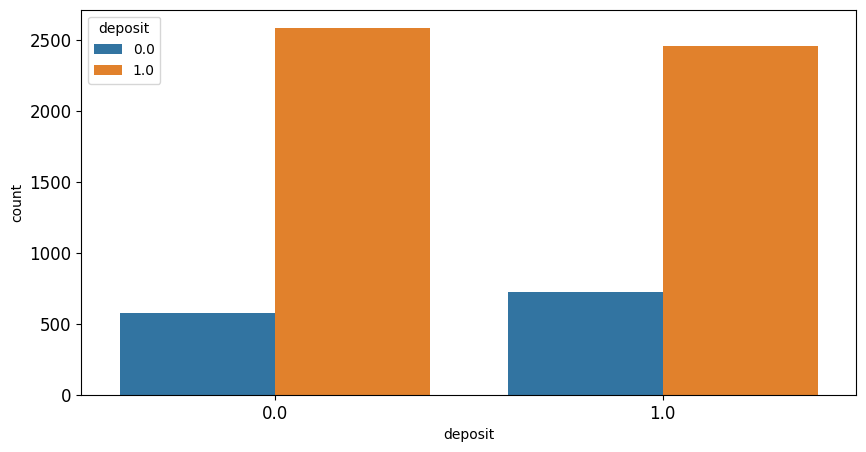

In [91]:
plt.figure(figsize = (10,5))
sns.countplot(x = y_res, data=data1 ,hue="deposit")
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.show()


In [92]:
print(X_res.columns)

Index(['age', 'default', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'education_primary', 'education_secondary', 'education_tertiary',
       'marital_divorced', 'marital_married', 'marital_single', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed'],
      dtype='object')


In [93]:
print(y_res.iloc[3:4])

3    0
Name: deposit, dtype: int64


model building

logistic regression

Accuracy is :  0.8132022471910112
[[888 180]
 [219 849]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1068
           1       0.83      0.79      0.81      1068

    accuracy                           0.81      2136
   macro avg       0.81      0.81      0.81      2136
weighted avg       0.81      0.81      0.81      2136

Confusion Matrix:
 [[888 180]
 [219 849]]


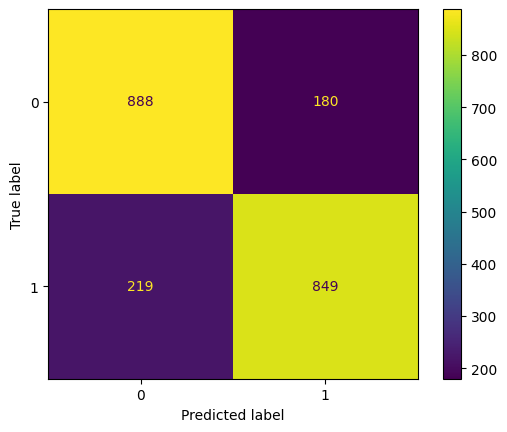

In [94]:
# training model with Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


lg = LogisticRegression()
lg.fit(X_res, y_res)
Lg_pred = lg.predict(x_test)
# Get the accuracy and classification report
from sklearn import metrics
print("Accuracy is : ", metrics.accuracy_score(y_test,Lg_pred))
print(metrics.confusion_matrix(y_test,Lg_pred))
print(metrics.classification_report(y_test,Lg_pred))


Lg_cm=confusion_matrix(y_test,Lg_pred)
print("Confusion Matrix:\n", Lg_cm)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=Lg_cm, display_labels=lg.classes_)
disp.plot()

random forest

Accuracy is :  0.8567415730337079
[[892 176]
 [130 938]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1068
           1       0.84      0.88      0.86      1068

    accuracy                           0.86      2136
   macro avg       0.86      0.86      0.86      2136
weighted avg       0.86      0.86      0.86      2136

Confusion Matrix:
 [[892 176]
 [130 938]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1068
           1       0.84      0.88      0.86      1068

    accuracy                           0.86      2136
   macro avg       0.86      0.86      0.86      2136
weighted avg       0.86      0.86      0.86      2136

0.8567415730337079


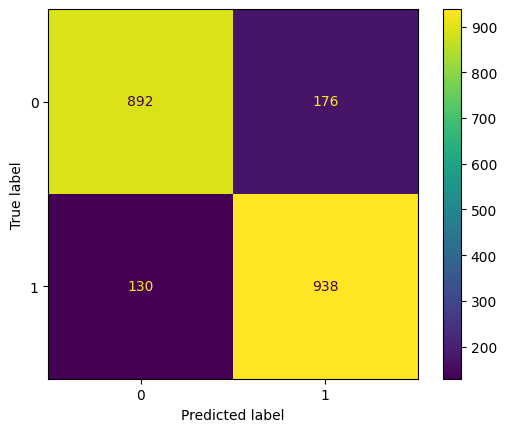

In [95]:
# Build model with Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_res, y_res)
rf_pred = rf.predict(x_test)
print("Accuracy is : ", metrics.accuracy_score(y_test, rf_pred))
print(metrics.confusion_matrix(y_test, rf_pred))
print(metrics.classification_report(y_test, rf_pred))



# Compute Confusion Matrix
rf_cm=confusion_matrix(y_test,rf_pred)
print("Confusion Matrix:\n", rf_cm)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf.classes_)
disp.plot()



from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4]
}

rf2 = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf2, param_grid=param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_res,y_res)

best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(x_test)

tuned_report = classification_report(y_test, y_pred_tuned)



print(tuned_report)
accuracy_rf = accuracy_score(y_test, y_pred_tuned)
print(accuracy_rf)


support vector machine

Accurace score is :  0.7949438202247191
[[876 192]
 [246 822]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1068
           1       0.81      0.77      0.79      1068

    accuracy                           0.79      2136
   macro avg       0.80      0.79      0.79      2136
weighted avg       0.80      0.79      0.79      2136

Confusion Matrix:
 [[876 192]
 [246 822]]


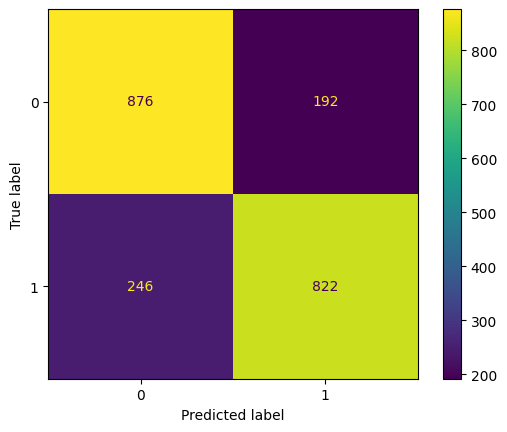

In [99]:
# Linear SVC
from sklearn.svm import SVC
lr_svc = SVC(kernel = 'rbf')
lr_svc.fit(X_res, y_res)
sv_pred = lr_svc.predict(x_test)
print("Accurace score is : ", metrics.accuracy_score(y_test, sv_pred))
print(metrics.confusion_matrix(y_test, sv_pred))
print(metrics.classification_report(y_test, sv_pred))




# Compute Confusion Matrix
sv_cm=confusion_matrix(y_test,sv_pred)
print("Confusion Matrix:\n",sv_cm)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=sv_cm, display_labels=lr_svc.classes_)
disp.plot()

In [100]:

print(y_res.iloc[420])

1


In [114]:
df3=np.asarray(df3)
df3=df3.reshape(1,-1)
scaler=StandardScaler()
df3=scaler.transform(df3)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [102]:
print(xg.predict(df3))

NameError: name 'xg' is not defined

xgboost

Accuracy is :  0.8600187265917603
[[903 165]
 [134 934]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1068
           1       0.85      0.87      0.86      1068

    accuracy                           0.86      2136
   macro avg       0.86      0.86      0.86      2136
weighted avg       0.86      0.86      0.86      2136

Confusion Matrix:
 [[903 165]
 [134 934]]


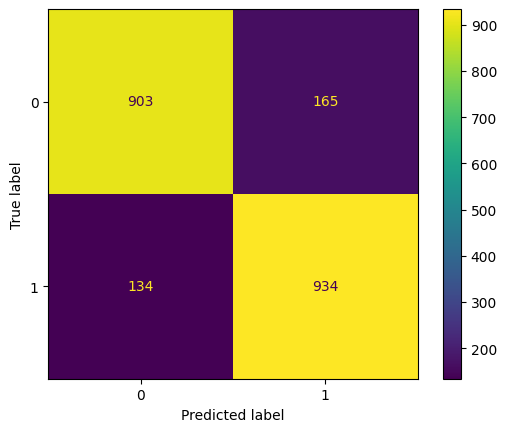

In [103]:
# xgboost
from xgboost import XGBClassifier
xg=XGBClassifier()

xg.fit(X_res,y_res,verbose=True)
xg_pred = xg.predict(x_test)
print("Accuracy is : ", metrics.accuracy_score(y_test, xg_pred))
print(metrics.confusion_matrix(y_test, xg_pred))
print(metrics.classification_report(y_test, xg_pred))



# Compute Confusion Matrix
xg_cm=confusion_matrix(y_test,xg_pred)
print("Confusion Matrix:\n", xg_cm)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=xg_cm, display_labels=xg.classes_)
disp.plot()

In [104]:
scalar=StandardScaler()

In [119]:
df3=(53,0,3765,0,0,1,20,6,1033,3,-1,0,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False)

In [120]:
df3=np.asarray(df3)
df3=df3.reshape(1,-1)
scaler=StandardScaler()
#df3=scaler.transform(df3)

In [121]:
print(xg.predict(df3))

[1]


In [122]:
df2D=(30,0,148,1,1,1,15,5,115,5,-1,0,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False)

In [123]:
df2D=np.asarray(df2D)
df2D=df2D.reshape(1,-1)


In [124]:
print(xg.predict(df2D))

[0]


k nearest neighbour

Accuracy is :  0.7888576779026217
[[829 239]
 [212 856]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1068
           1       0.78      0.80      0.79      1068

    accuracy                           0.79      2136
   macro avg       0.79      0.79      0.79      2136
weighted avg       0.79      0.79      0.79      2136

Confusion Matrix:
 [[829 239]
 [212 856]]


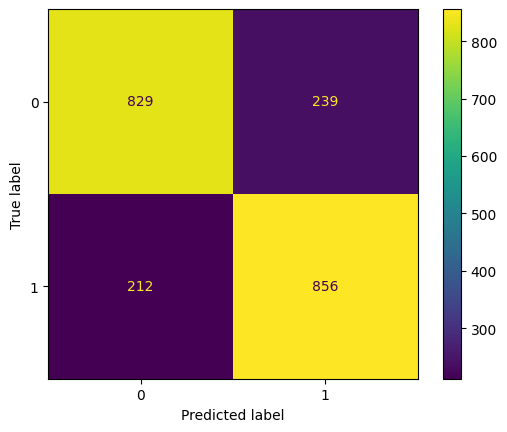

In [108]:
# build model with KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_res, y_res)
knn_pred = knn.predict(x_test)
# print the accuracy and classification report
print("Accuracy is : ", metrics.accuracy_score(y_test, knn_pred))
print(metrics.confusion_matrix(y_test, knn_pred))
print(metrics.classification_report(y_test, knn_pred))




# Compute Confusion Matrix
knn_cm=confusion_matrix(y_test,knn_pred)
print("Confusion Matrix:\n", knn_cm)

# Display Confusion Matrix
disp=ConfusionMatrixDisplay(confusion_matrix=knn_cm ,display_labels=knn.classes_)
disp.plot()


decision tree

Accuracy is :  0.8061797752808989
[[874 194]
 [220 848]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1068
           1       0.81      0.79      0.80      1068

    accuracy                           0.81      2136
   macro avg       0.81      0.81      0.81      2136
weighted avg       0.81      0.81      0.81      2136

Confusion Matrix:
 [[874 194]
 [220 848]]


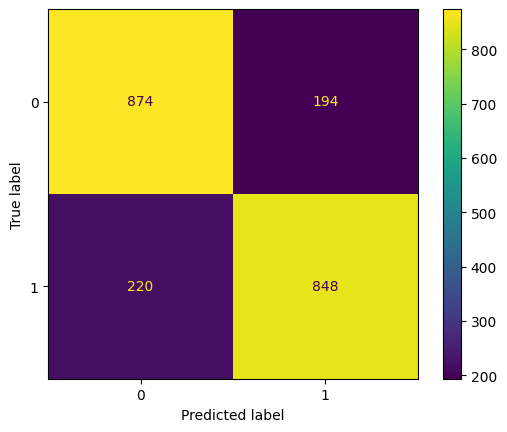

In [109]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_res, y_res)
dt_pred = dt.predict(x_test)
# print the accuracy and classification report
print("Accuracy is : ", metrics.accuracy_score(y_test, dt_pred))
print(metrics.confusion_matrix(y_test, dt_pred))
print(metrics.classification_report(y_test, dt_pred))




# Compute Confusion Matrix
dt_cm=confusion_matrix(y_test,dt_pred)
print("Confusion Matrix:\n", dt_cm)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=dt.classes_)
disp.plot()

Accuracy of AdaBoost: 0.86
Cross-validated Accuracy: 0.86 (+/- 0.00)
Confusion Matrix:
 [[921 147]
 [156 912]]


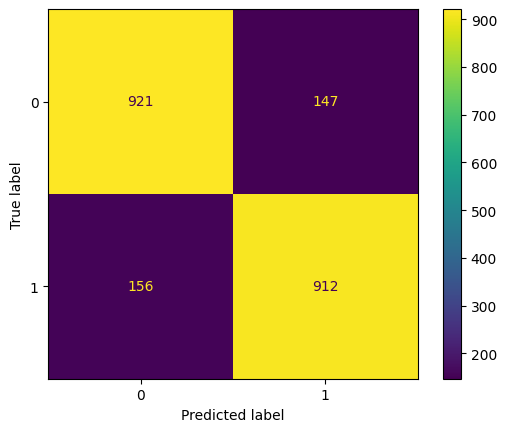

In [110]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


base_estimator = DecisionTreeClassifier(max_depth=3)  # Weak learner: stump (max_depth=1)
#keep max_depth=3(chatgpt)
#base_estimator=SVC(kernel = 'rbf')


#. Initialize the AdaBoost Classifier
adaboost = AdaBoostClassifier(estimator=base_estimator, 
                              n_estimators=50,  # Number of weak learners
                              learning_rate=1.0,  # Shrinks contribution of each learner
                              random_state=42)


# 4. Train the AdaBoost model
adaboost.fit(X_res, y_res)

# 5. Make predictions
ad_y_pred=adaboost.predict(x_test)

# 6. Evaluate the model
accuracy=metrics.accuracy_score(y_test,ad_y_pred)
print(f"Accuracy of AdaBoost: {accuracy:.2f}")

# Optional: Cross-validation for more robust evaluation
cv_scores = cross_val_score(adaboost, X_res,y_res, cv=5)
print(f"Cross-validated Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std():.2f})")














param_grid = {
    'base_estimator__max_depth': [1,2,3],  # Set depth for the base DecisionTreeClassifier
    'n_estimators': [50, 100, 150],          # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 1.0]        # Learning rate
}




# Compute Confusion Matrix
ad_cm=confusion_matrix(y_test,ad_y_pred)
print("Confusion Matrix:\n",ad_cm)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=ad_cm, display_labels=adaboost.classes_)
disp.plot()



In [111]:

# Scikit-learn Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Data Manipulation
import pandas as pd
import numpy as np

# Visualization (Optional)
import matplotlib.pyplot as plt
import seaborn as sns



In [112]:
print(X_res.shape)
print(y_res.shape)
print(y_res.ndim)
print(X_res.isnull().sum())
print(y_res.isnull().sum())


(6700, 32)
(6700,)
1
age                    0
default                0
balance                0
housing                0
loan                   0
contact                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
education_primary      0
education_secondary    0
education_tertiary     0
marital_divorced       0
marital_married        0
marital_single         0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
dtype: int64
0


In [113]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Define parameters to tune
#The param_grid in the code refers to a dictionary that defines the hyperparameter values you want to test during Grid Search. It is part of hyperparameter tuning where different combinations of parameters are tested to identify the best-performing model.


param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
#grid_search.fit(X_res,y_res)

#print("Best Parameters:", grid_search.best_params_)
#print("Best Score:", grid_search.best_score_)

In [125]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot

from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import GradientBoostingClassifier

In [126]:
import sklearn

In [127]:
from sklearn import model_selection

In [128]:
from sklearn.model_selection import cross_val_score

In [129]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import GradientBoostingClassifier


clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4=DecisionTreeClassifier()
clf5=XGBClassifier()
clf6 = LogisticRegression()
#meta_clf = GradientBoostingClassifier()
#meta_clf=SVC(kernel = 'rbf')
#meta_clf=RandomForestClassifier()
#meta_clf=DecisionTreeClassifier()
#meta_clf=LogisticRegression()
meta_clf=GaussianNB()
#meta_clf=AdaBoostClassifier(estimator=base_estimator, 
#                              n_estimators=50,  # Number of weak learners
#                             learning_rate=1.0,  # Shrinks contribution of each learner
#                            random_state=42)

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5,clf6], 
                          meta_classifier=meta_clf)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, clf4, clf6,sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'decision tree',
                       
                       'logistic regression',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, x_test,y_test,
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.81 (+/- 0.01) [KNN]
Accuracy: 0.85 (+/- 0.00) [Random Forest]
Accuracy: 0.74 (+/- 0.01) [Naive Bayes]
Accuracy: 0.79 (+/- 0.02) [decision tree]
Accuracy: 0.82 (+/- 0.02) [logistic regression]
Accuracy: 0.85 (+/- 0.00) [StackingClassifier]


In [130]:
import pickle

In [131]:
pickle.dump(xg,open("xg.pkl","wb"))


In [132]:
pickle.dump(scaler,open("scl.pkl","wb"))

In [ ]:
import subprocess
subprocess.run(["streamlit","run","project.py"])